In [2]:
import base64
import vertexai
from vertexai.generative_models import GenerativeModel, Part, SafetySetting
from vertexai.preview.prompts import Prompt


def generate():
    vertexai.init(project="dish-data-lab-prod-2512", location="us-central1")
    variables = [
        {
            "business": ["""dönerbude"""],
            "language": ["""deutsch"""],
            "topic": ["""Kostenloses Ayran zum Döner!"""],
        },
    ]
    prompt = Prompt(
        prompt_data=[text1],
        model_name="gemini-1.5-flash-002",
        variables=variables,
        generation_config=generation_config,
        safety_settings=safety_settings,
    )
    # Generate content using the assembled prompt. Change the index if you want
    # to use a different set in the variable value list.
    responses = prompt.generate_content(
        contents=prompt.assemble_contents(**prompt.variables[0]),
        stream=True,
    )

    for response in responses:
        print(response.text, end="")

text1 = """You are a social media post generator specializing in 
creating engaging content for small restaurants and gastro businesses. 
You will receive parameters from a front-end application, 
which you will use to generate social media posts.

Instructions:
1. Carefully analyze the provided parameters.
2. You have no opportunity to ask questions, answer directly.
3. Generate one distinct social media post based on the provided parameters and business type.
4. Strukturiere das JSON nach Title, Content, Hashtags
5. Content darf keine Hashtags enthalten
Parameters:
{business}
{language}
{topic}"""

generation_config = {
    "max_output_tokens": 8192,
    "temperature": 2,
    "top_p": 0.95,
}

safety_settings = [
    SafetySetting(
        category=SafetySetting.HarmCategory.HARM_CATEGORY_HATE_SPEECH,
        threshold=SafetySetting.HarmBlockThreshold.OFF
    ),
    SafetySetting(
        category=SafetySetting.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT,
        threshold=SafetySetting.HarmBlockThreshold.OFF
    ),
    SafetySetting(
        category=SafetySetting.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT,
        threshold=SafetySetting.HarmBlockThreshold.OFF
    ),
    SafetySetting(
        category=SafetySetting.HarmCategory.HARM_CATEGORY_HARASSMENT,
        threshold=SafetySetting.HarmBlockThreshold.OFF
    ),
]

generate()

Assembled prompt replacing: 1 instances of variable business, 1 instances of variable language, 1 instances of variable topic


E:\anaconda3\envs\Big-Data-Consultingprojekt\Lib\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


```json
{
  "Title": "Gratis Ayran zu deinem Döner!",
  "Content": "Leckerer Döner und jetzt auch noch ein kühles, erfrischendes Ayran gratis dazu!  Bei uns in der Dönerbude erhältst du zu jedem Döner ein kostenloses Ayran.  Komm vorbei und lass es dir schmecken!  Angebot gilt nur für kurze Zeit!",
  "Hashtags": "#Döner #GratisAyran #Dönerbude #DeutscherDöner #Ayran #kostenlos #Angebot #LimitedTimeOffer #GermanFood #StreetFood #leckerschmecker #essen #food #instafood #foodporn #dönertime"
}
```


In [3]:
from google.cloud import aiplatform
from google.protobuf import json_format
from google.protobuf.struct_pb2 import Value
from typing import Dict, List, Union

def predict_flux_model(
    project: str,
    endpoint_id: str,
    instances: Union[Dict, List[Dict]],
    location: str = "us-central1",
    api_endpoint: str = "us-central1-aiplatform.googleapis.com",
):
    """
    Predict using a custom Flux Schnell image model on Google AI Platform.
    
    `instances` can be either a single instance (dict) or a list of instances.
    """
    # Set the AI Platform regional API endpoint
    client_options = {"api_endpoint": api_endpoint}
    
    # Initialize the PredictionServiceClient
    client = aiplatform.gapic.PredictionServiceClient(client_options=client_options)
    
    # Ensure instances are in list format
    instances = instances if isinstance(instances, list) else [instances]
    
    # Parse each instance to a protobuf Value object
    instances = [
        json_format.ParseDict(instance_dict, Value()) for instance_dict in instances
    ]
    
    # Define additional parameters for the Flux Schnell model if necessary
    parameters_dict = {
        "num_inference_steps": 4,
        "width": 512,
        "height": 512
    }
    
    parameters = json_format.ParseDict(parameters_dict, Value())
    
    # Construct the endpoint path
    endpoint = client.endpoint_path(
        project=project, location=location, endpoint=endpoint_id
    )
    
    # Send the predict request
    response = client.predict(
        endpoint=endpoint, instances=instances, parameters=parameters
    )
    
    # Print response information
    print("Response:")
    print(" Deployed Model ID:", response.deployed_model_id)
    
    # Print predictions
    return response.predictions
    

# Beispielaufruf für das Flux Schnell Modell
# Beispielaufruf für das Flux Schnell Modell
result = predict_flux_model(
    project="203911251712",
    endpoint_id="3220365104151265280",
    location="us-central1",
    instances=["A cat holding a sign that says hello world. as png image"]
)

Response:
 Deployed Model ID: 2689147056307568640


In [30]:
print(result[0])

iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAIAAAB7GkOtAAEAAElEQVR4nOz997Ml2X0fCH6+33PSXPvuu8/Wq1e2qz3QRANoACRAABRJSdRQGo2N4cQodndiInY0ERv7J2zExkbshGZWE5JmYkYSNTEciTIEnQgPgiAAAg2g0d5WV5c3r149b65Jc873uz9k3vvuc9XVFt1d9Y2KV3kzT2aePObrDakKQChAB4d7Dkb/DlsOgXAPfsEwnKD9cG923gno7gE8aAvsnKODbnkvugQogbB7xgfv3fX+YQMCAAFAYN19nnRwz+H9focf9V6Pyd0Gbzqeuutw1xJW0OC3eOFdV2nfwYGP3r8r3mfQ3Qfvfwfea9j/Xbf/xgOx/xAf7RkuHHT+rY7hR2/MC9CRf3vOYPc4057/h5duOzTvbNy02HoDbC4EJSjt9EMBJQhBBieVAIICQqqkAIS0fAhBSLVopoPnH9jhw/b7cKHuWbF7ftIhze7BW4UDl+Weg4OGd2cJ004rZiZVX66R2/AvJYOpICrXIA0XY/HU953Ij8ooeJde/aHmU0bHQbF3XD683/ULhF1I/0DpGGUL2t340B00aPNO+6VDvn2UZ9uNXYVA0AF5gCoIUAIPKMgQ25eNiIYShEJv29HDPvDN+v3hXocfhP4fiPfugKAOmheTvqPyIS/KO7/u4PsO0zO8D6OzX++0jx17y087kOzdfjO/pVccePthiGCPhmH/Nx4464cpfw6E2997m0/Wgxrj8G858Pb3Au5EHD6QgT1wI93pYB7UdOchVOLb0Re/+UDd6RjpCO4e5d20YPgJWip79n8KcSEFUEFFFACDRJVpiAZEd54JgPZ26zCkcydDt2d5fxBQ6m3gXezeO/ne/ajgbXahpOo6XKCqJKVceMgeeFOx4P2H9/q9H/BFeRu4zfp4SyjyTl70IR2itwG658d+Eo29e7QQs2/T8O0OoO7qjdKuSwSAlEA65Pt36wOYBx1Q

In [4]:
import base64
from PIL import Image
from io import BytesIO
from typing import List
import IPython.display as display

def display_prediction(predictions: List):
    
    # Extrahiere den ersten Eintrag
    image_data = predictions[0]
    
    # Entferne mögliche Präfixe, falls vorhanden
    if isinstance(image_data, str):
        if "," in image_data:
            image_data = image_data.split(",")[1]

        # Korrigiere Padding, falls erforderlich
        missing_padding = len(image_data) % 4
        if missing_padding:
            image_data += "=" * (4 - missing_padding)

        # Dekodiere Base64-Daten
        try:
            image_bytes = base64.b64decode(image_data)
            image = Image.open(BytesIO(image_bytes))
            
            # Zeige das Bild an
            display.display(image)
        except Exception as e:
            print("Fehler beim Decodieren oder Anzeigen des Bildes:", e)
    else:
        print("Vorhersage-Daten sind nicht vom Typ 'str'. Überprüfe den Rückgabetyp!")

# Beispielaufruf
result = predict_flux_model(
    project="203911251712",
    endpoint_id="3220365104151265280",
    location="us-central1",
    instances=["A cat holding a sign that says marius lutscht. as png image"]
)

Response:
 Deployed Model ID: 2689147056307568640


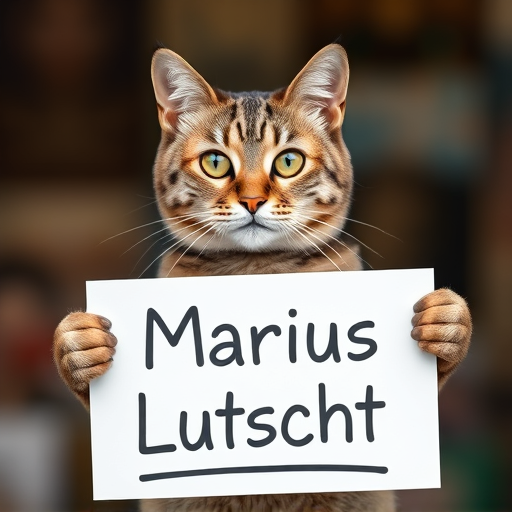

In [52]:
# Bild anzeigen
display_prediction(result)


In [7]:
def endpoint_predict_sample(
    project: str, location: str, instances: list, endpoint: str
):
    aiplatform.init(project=project, location=location)

    endpoint = aiplatform.Endpoint(endpoint)

    prediction = endpoint.predict(instances=instances)    
    return prediction

project = 'dish-data-lab-prod-2512'

location = 'us-central1'

prompt= "A close-up, ultra-realistic image of a freshly prepared döner kebab, showcasing a golden-brown, slightly crispy flatbread wrap. The wrap is generously filled with thinly sliced, juicy roasted meat, fresh green lettuce, red cabbage, sliced tomatoes, cucumber, feta cheese and a drizzle of creamy white garlic sauce. The ingredients appear vibrant and fresh, with drops of sauce glistening under soft, natural lighting. A side view angle highlights the texture of the bread and the layering of colorful fillings. The background is softly blurred to emphasize the döner as the main subject, giving it an appetizing, professional look."

instances = [prompt]

response2 = endpoint_predict_sample(project=project, location=location, instances=instances, endpoint="3220365104151265280")

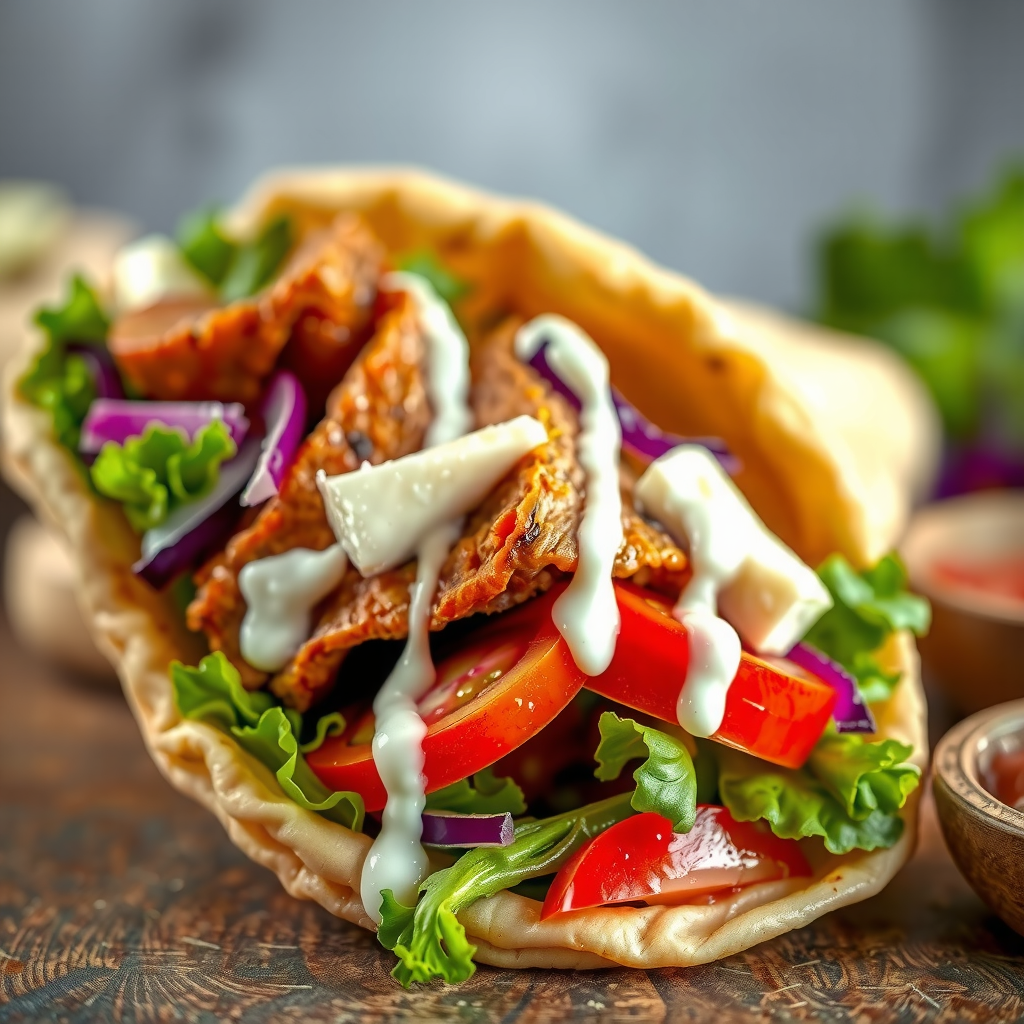

In [8]:
display_prediction(response2.predictions)